In [ ]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv',encoding='latin1');

In [ ]:
print(df.head(8));
print(df.columns);
print(df.describe());
print(df.info);
df.dropna(inplace=True);
print(df.isnull().sum());
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce');
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce');
df['Order Month']=df['Order Date'].dt.month;
df['Order Year']=df['Order Date'].dt.year;
print(df.tail(5));




   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
5       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
6       7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
7       8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angele

### `Profit Monthwise`

<ipython-input-79-01b7610ce139>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Order Month',y='Profit',data=df,estimator=sum,palette='cubehelix_r',errorbar=None);


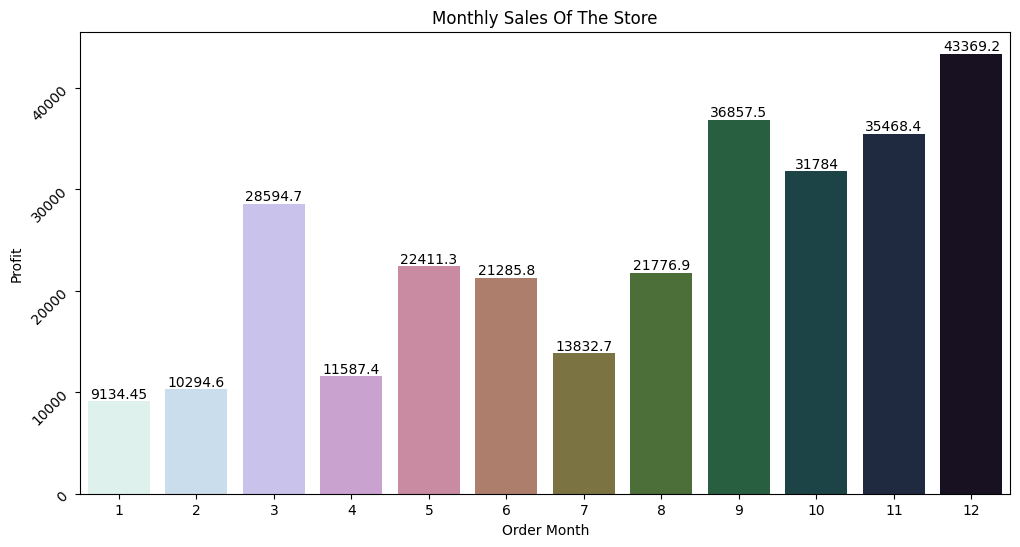

In [ ]:
plt.figure(figsize=(12, 6))

ax=sns.barplot(x='Order Month',y='Profit',data=df,estimator=sum,palette='cubehelix_r',errorbar=None);
for i in ax.containers :
  ax.bar_label(i);
plt.yticks(rotation=45);
plt.xlabel('Order Month');
plt.ylabel('Profit');
plt.title('Monthly Sales Of The Store');
plt.show();

**December has the highest Profit & January has the lowest one**




### `Sales By Category`

<ipython-input-120-40ff9cd0164e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=df.groupby('Category')['Sales'].sum(),y=df.groupby('Category')['Sales'].sum().index , palette='Set2');


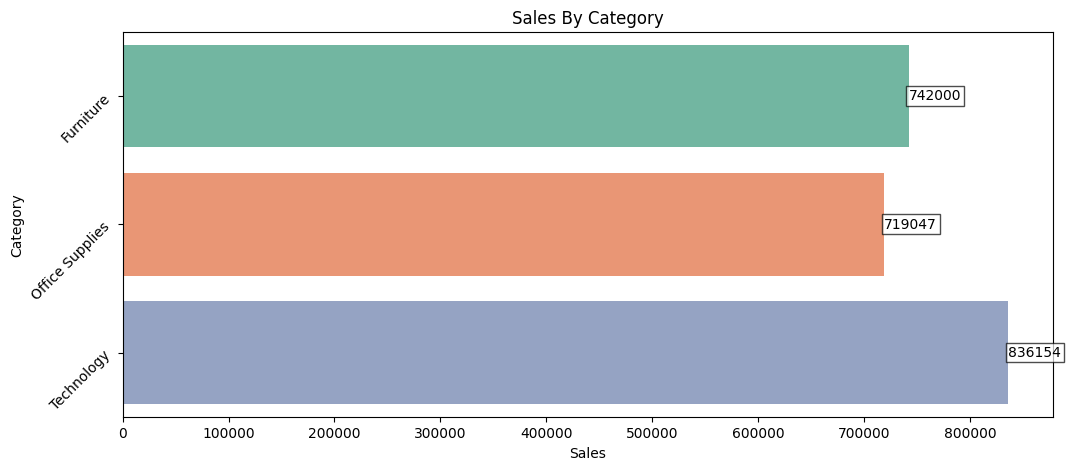

In [ ]:
plt.figure(figsize=(12, 5));

ax=sns.barplot(x=df.groupby('Category')['Sales'].sum(),y=df.groupby('Category')['Sales'].sum().index , palette='Set2');
for i in ax.containers :
      ax.bar_label(i, bbox={"facecolor": "white", "alpha": 0.7, "pad": 2})
plt.yticks(rotation=45);
plt.xlabel('Sales');
plt.ylabel('Category');
plt.title('Sales By Category');
plt.show();

**Technology has the maximum sales & Office Supplies has the lowest sales**

### `Sales By Sub-Categories`

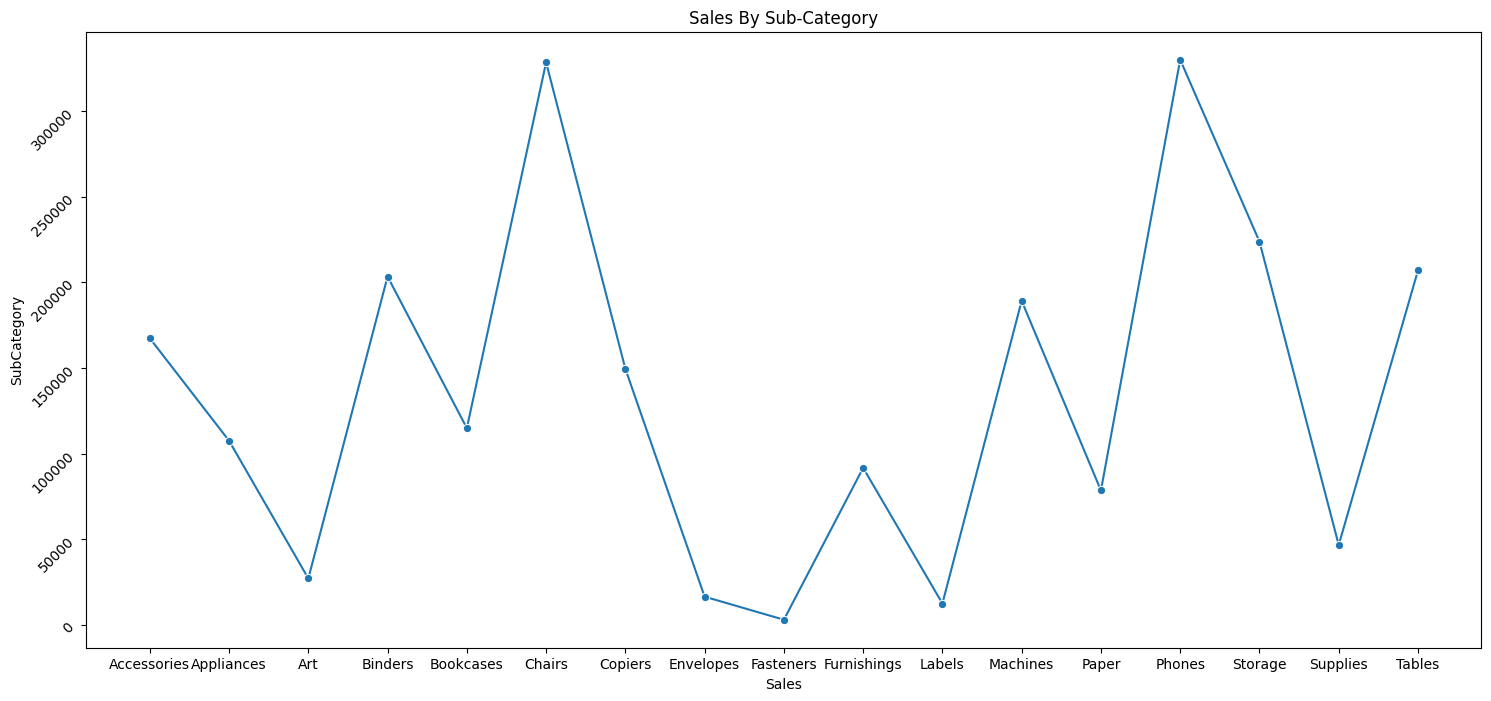

In [ ]:
plt.figure(figsize=(18, 8));

ax=sns.lineplot(x=df.groupby('Sub-Category')['Sales'].sum().index,y=df.groupby('Sub-Category')['Sales'].sum(),marker='o',dashes=False);
for i in ax.containers :
      ax.bar_label(i, bbox={"facecolor": "white", "alpha": 0.7, "pad": 2});
plt.yticks(rotation=45);
plt.xlabel('Sales');
plt.ylabel('SubCategory');
plt.title('Sales By Sub-Category');
plt.show();

**Chairs & Phones have maximum sales while fasteners & labels have minimum**




### `Monthwise Sales`

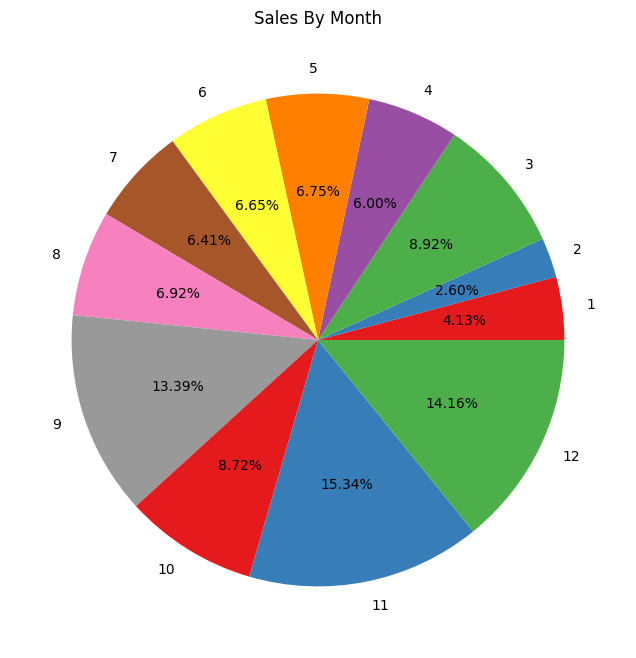

In [ ]:
plt.figure(figsize=(8,8));
plt.pie(x=df.groupby('Order Month')['Sales'].sum(),labels=df.groupby('Order Month')['Sales'].sum().index,autopct='%1.2f%%',colors=sns.color_palette('Set1'));
plt.title('Sales By Month');
plt.show();

**November has the highest sales , February has the lowest**

# **`Profit By Category & SubCategory`**

<ipython-input-9-cd7e538a32be>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=df.groupby('Category')['Profit'].sum().index,y=df.groupby('Category')['Profit'].sum(),palette='Set2',estimator=sum);


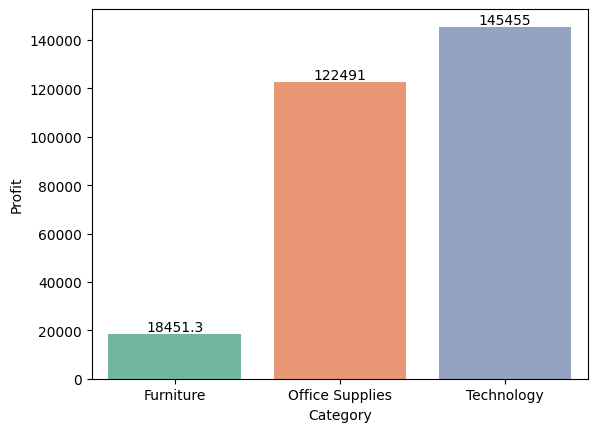

In [ ]:
ax=sns.barplot(x=df.groupby('Category')['Profit'].sum().index,y=df.groupby('Category')['Profit'].sum(),palette='Set2',estimator=sum);
for i in ax.containers :
      ax.bar_label(i)

<ipython-input-22-b27c09de23f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=df.groupby('Sub-Category')['Profit'].sum().index,y=df.groupby('Sub-Category')['Profit'].sum(),palette='Set2',estimator=sum);


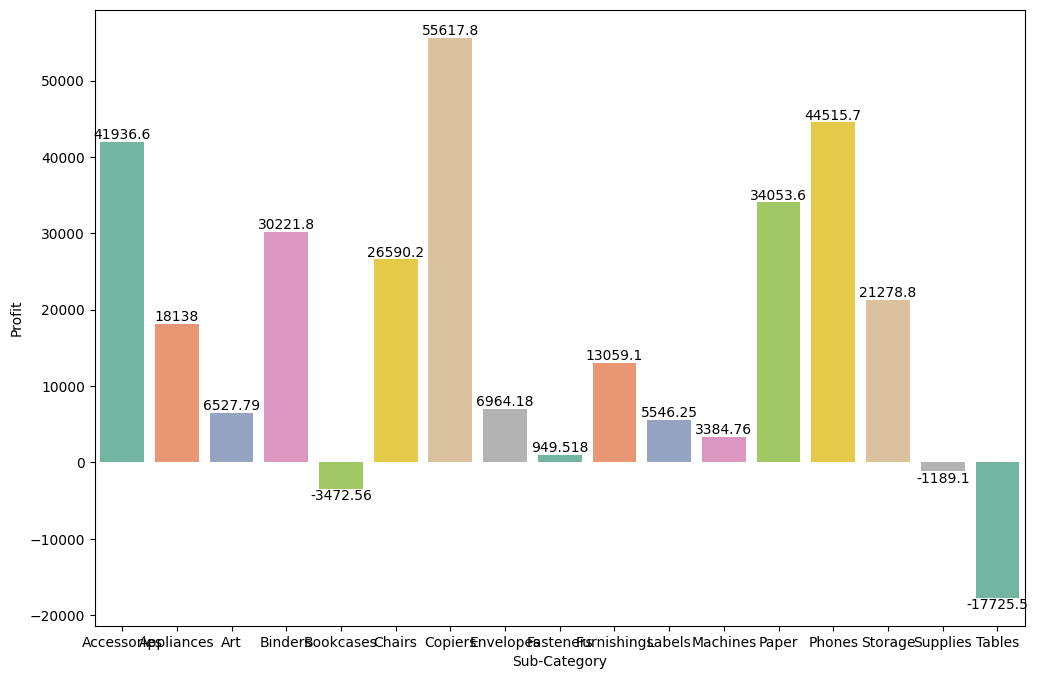

In [ ]:
plt.figure(figsize=(12,8));
ax=sns.barplot(x=df.groupby('Sub-Category')['Profit'].sum().index,y=df.groupby('Sub-Category')['Profit'].sum(),palette='Set2',estimator=sum);
for i in ax.containers :
      ax.bar_label(i);
plt.show();

**Copiers provide highest profit & Tables made most loss**

### `Sales & Profit By SubCategory`

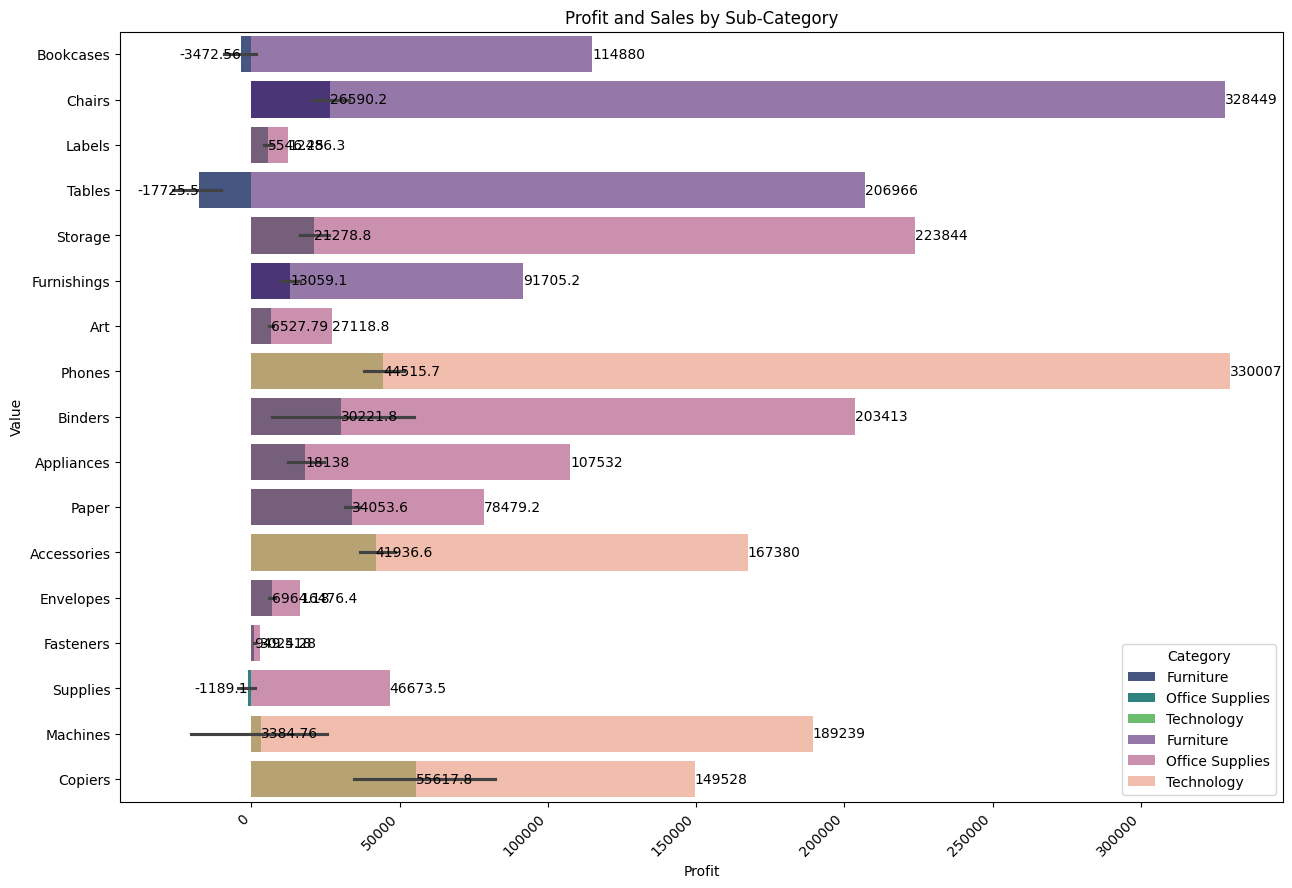

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

sns.barplot(y='Sub-Category', x='Profit', data=df, hue='Category', estimator=sum, palette='viridis')  # Add Profit
ax=sns.barplot(y='Sub-Category', x='Sales', data=df, hue='Category', estimator=sum, palette='magma', alpha=0.6,errorbar=None)  # Add Sales bars with transparency
for i in ax.containers:
    ax.bar_label(i);
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Profit and Sales by Sub-Category')
plt.legend(title='Category')

plt.show()

**Chairs have highest sale but Copiers have highest profit**

### `Customer Segment & Ship-Mode Insights`

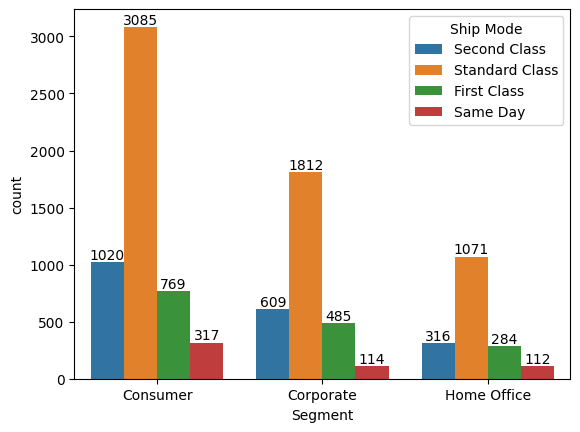

In [ ]:
ax=sns.countplot(x='Segment',data=df,hue='Ship Mode');
for i in ax.containers :
      ax.bar_label(i);

# `Orders Rush StateWise`

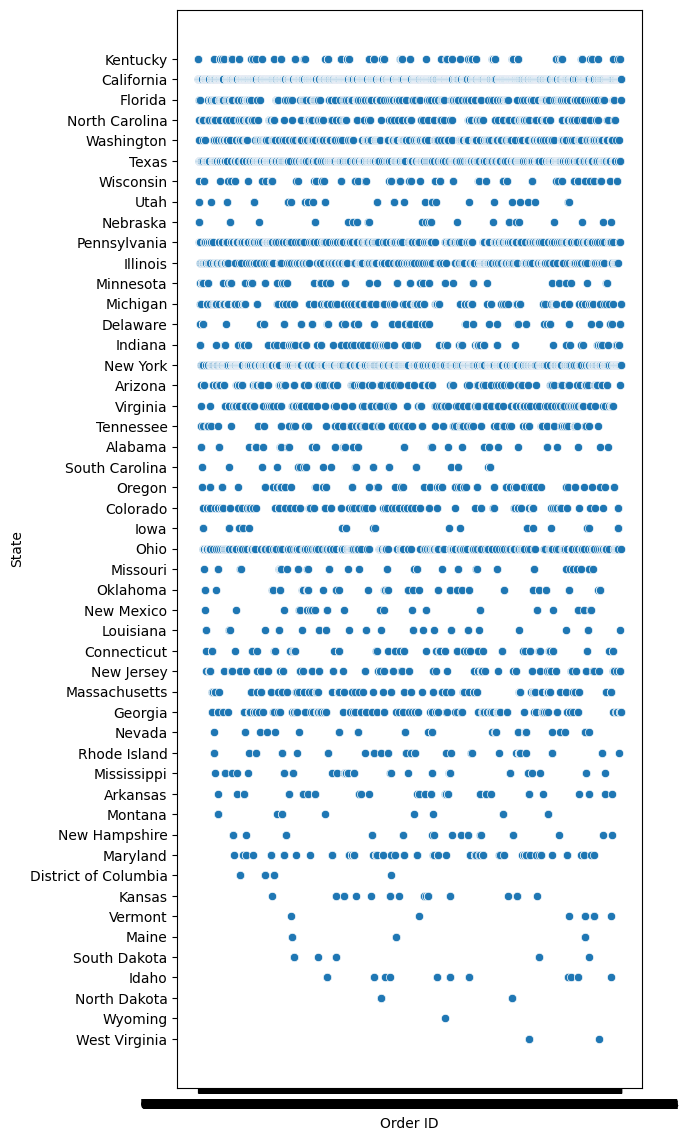

In [ ]:
plt.figure(figsize=(6,14));
sns.scatterplot(y='State',x='Order ID',data=df);
plt.show();

# `Regionwise Profit`

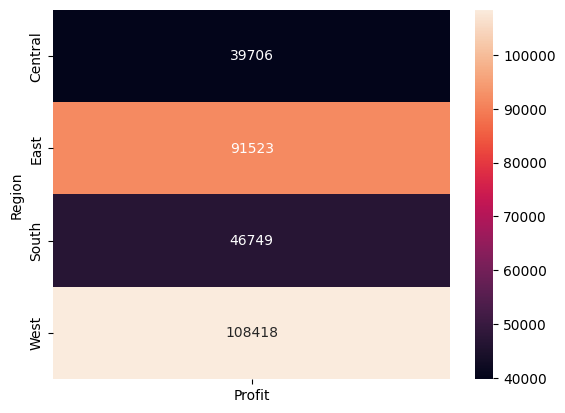

In [ ]:
sns.heatmap(df.groupby('Region')['Profit'].sum().to_frame(),annot=True,fmt='.0f');

## `Profit-Sales Ratio Insights`

**Technology Category generates highest profit per sales**

<ipython-input-23-cb610ef312cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=df.groupby('Category')['salestoprofit'].mean().index,y=df.groupby('Category')['salestoprofit'].mean(),palette='Set1');


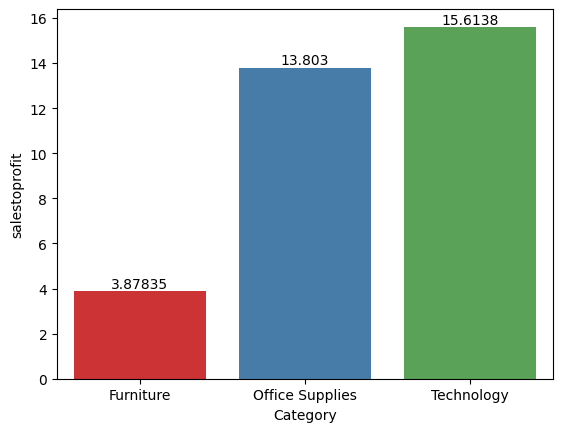

In [ ]:
df['salestoprofit']=(df['Profit']/df['Sales'])*100;
ax=sns.barplot(x=df.groupby('Category')['salestoprofit'].mean().index,y=df.groupby('Category')['salestoprofit'].mean(),palette='Set1');
for i in ax.containers :
      ax.bar_label(i);

In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'df' and the date columns are 'Order Date' and 'Ship Date'
date_columns = ['Order Date', 'Ship Date']

for col in date_columns:
    # Attempt to convert to datetime with day first
    df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='ignore')

    # For those that failed, try month first
    mask = ~pd.isnull(df[col]) & df[col].astype(str).str.match(r'\d{2}/\d{2}/\d{4}')  #Find rows where col contains format mm/dd/yyyy, which would have been kept as string after 1st conversion.
    df.loc[mask, col] = pd.to_datetime(df.loc[mask, col].astype(str).str.replace(r'(\d{2})/(\d{2})/(\d{4})', r'\2/\1/\3',regex=True), format='%d/%m/%Y', errors='coerce')  #convert to dd/mm/yyyy, and then to timestamp

    # Convert all to desired string format
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.strftime('%d-%m-%Y')

<ipython-input-5-4d5ec28546fd>:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='ignore')
<ipython-input-5-4d5ec28546fd>:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='ignore')


In [ ]:
print(df);

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  08-11-2016  11-11-2016    Second Class   
1          2  CA-2016-152156  08-11-2016  11-11-2016    Second Class   
2          3  CA-2016-138688  12-06-2016  16-06-2016    Second Class   
3          4  US-2015-108966  11-10-2015  18-10-2015  Standard Class   
4          5  US-2015-108966  11-10-2015  18-10-2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422  21-01-2014  23-01-2014    Second Class   
9990    9991  CA-2017-121258  26-02-2017  03-03-2017  Standard Class   
9991    9992  CA-2017-121258  26-02-2017  03-03-2017  Standard Class   
9992    9993  CA-2017-121258  26-02-2017  03-03-2017  Standard Class   
9993    9994  CA-2017-119914  04-05-2017  09-05-2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [ ]:
df.to_csv('my_dataframe.csv', index=False)